In [20]:
import csv
import numpy as np

firstWhale = "w_1287fbc"
infile = open('whale/train.csv', mode='r')
rows = csv.reader(infile)
BobPics = []
UnknownPics = []
for row in rows:
    if row[1] == firstWhale:
        BobPics.append(row[0]) 
    else:
        UnknownPics.append(row[0])

UnknownPics = np.random.permutation(UnknownPics[10:500])

In [21]:
class LearningSet:
    def __init__(self):
        self.x = 0
        self.y = 0
    
    def compare(self,image):
        sx = self.x
        sy = self.y
        self.x = max([self.x, image.shape[0]])
        self.y = max([self.x, image.shape[1]])
        if sx == self.x & sy == self.y:
            return True
        else:
            return False
        
    
    def prepareBatch(self, Images=self.Batch, classifier=self.label):
        # In this function, what is Images?
        # Classifier is an array of number classifications, if there are 
        # 25 distinct classifiers, then we find at each index a number between 0
        # and 24
        l = len(Images)
        self.label = np.zeros((l,2))
        self.Batch = np.zeros((l,self.x,self.y,1))
        for i in range(l):
            self.label[i,classifier[i]] = 1
            x = Images[i].shape[0]
            y = Images[i].shape[1]
            self.Batch[i,0:x,0:y,0] = Images[i]
    
    def append(self, a):
        if not compare(self,a):
            self.prepareBatch()
            

446
1050


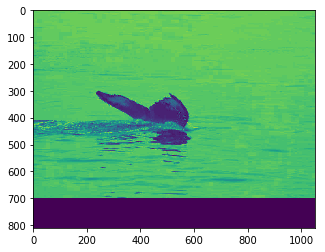

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

BobsTail = []
UnknownsTail = []
padding = maxImageDimensions()
for p in BobPics:
    grey = np.asarray(Image.open("whale/" + p))[:,:,0]
    padding.compare(grey)
    BobsTail.append(grey)
for p in UnknownPics:
    try:
        grey = np.asarray(Image.open("whale/" + p))[:,:,0]
        padding.compare(grey)
        UnknownsTail.append(grey)
    except:
        pass
samples = len(BobsTail+UnknownsTail)
print(samples)
label = np.zeros((samples, 2))
Tail = np.zeros((samples,padding.x,padding.y,1))
for i in range(len(BobsTail)):
    label[i,0] = 1
    x = BobsTail[i].shape[0]
    y = BobsTail[i].shape[1]
    Tail[i,0:x,0:y,0] = BobsTail[i]
for i in range(len(UnknownsTail)):
    ind = i+len(BobsTail)
    label[ind,0] = 1
    x = UnknownsTail[i].shape[0]
    y = UnknownsTail[i].shape[1]
    Tail[ind,0:x,0:y,0] = UnknownsTail[i]
    label[ind,1] = 1
    
print(padding.y)
plt.imshow(Tail[0,:,:,0])
plt.show()

In [23]:
import pandas as pd
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (padding.x,padding.y,1)))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4), strides=(8,8)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "sigmoid"))
          
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.fit(Tail, label, epochs=5, batch_size=5)


Epoch 1/5
446/446 [==============================] - 502s 1s/step - loss: nan - acc: 0.9507
Epoch 2/5
446/446 [==============================] - 480s 1s/step - loss: nan - acc: 1.0000
Epoch 3/5
446/446 [==============================] - 467s 1s/step - loss: nan - acc: 1.0000
Epoch 4/5
446/446 [==============================] - 499s 1s/step - loss: nan - acc: 1.0000
Epoch 5/5
446/446 [==============================] - 480s 1s/step - loss: nan - acc: 1.0000


In [ ]:
loss_and_metrics = model.evaluate(test_numbers[5:9,:],test_label[5:9,:], batch_size=4)
print(loss_and_metrics)